# Car Price Prediction Geely Auto (Multi Linear Regression)

Building a linear regression model for the prediction of car prices r American companies in the USA market.

Steps invlved in the predictive analysis:
- Business Problem Understanding
- Data Exploration
- Data Cleaning and Standardization
- Model Building
- Model Evaluation


---
## Step 1. Data Exploration and Understanding the Problem

Importing the libraries and data, and understanding its parameters like shape, dtypes, and etc.

In [1]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV,RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from mpl_toolkits.mplot3d import axes3d
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [3]:
# reading the data with all the columns visible
pd.options.display.max_columns=None
car_df = pd.read_csv('CarPrice_Assignment.csv')
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# information about columns
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
# shape of dataframe
car_df.shape

(205, 26)

In [6]:
# count of null values in every column
car_df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
# describing every column
car.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


---
##  Step 2. Data Cleaning and Standardization

In [8]:
# dropping duplicate rows if any
car_df.drop_duplicates()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [9]:
# carnames with their count in the data
car_df['CarName'].astype('category').value_counts()

CarName
peugeot 504            6
toyota corona          6
toyota corolla         6
subaru dl              4
toyota mark ii         3
                      ..
honda prelude          1
honda civic 1500 gl    1
honda civic 1300       1
honda civic (auto)     1
vw rabbit              1
Name: count, Length: 147, dtype: int64

##### As we can see that `CarName` column contains the car company name and the model name together.

##### So we can extract the name of Car Company from `CarName` column and put it in some other column.

In [11]:
# Extracting Car Brand name from 'CarName' column and putting it into a new column called 'Brand'
def split(x):
    return x.split(' ')[0]

car_df['Brand'] = car_df['CarName'].apply(split)
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [12]:
# count of car brands in the data
car_df['Brand'].astype('category').value_counts()

Brand
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
chevrolet       3
jaguar          3
alfa-romero     3
vw              2
renault         2
maxda           2
porcshce        1
toyouta         1
vokswagen       1
mercury         1
Nissan          1
Name: count, dtype: int64

---
##### We can see that there are some mistakes in the data.There are some repetitions in company names because of the writing mistake as mentioned below:

- `toyota` : `toyouta`
- `Nissan` : `Nissan`
- `porsche` : `porcsche`
- `mazda` : `maxda`
- `volkswagen` : `vw`, `vokswagen`

In [13]:
# Converting all the Brand names to lowercase alphabets
car_df['Brand'] = car_df['Brand'].apply(lambda y: y.lower())

# corecting the wrongly marked data in the dataset
car_df.loc[(car['Brand'] == 'vw') | (car_df['Brand'] == 'vokswagen'),'Brand'] = 'volkswagen'
car_df.loc[(car['Brand'] == 'toyouta'),'Brand'] = 'toyota'
car_df.loc[(car['Brand'] == 'maxda'),'Brand'] = 'mazda'
car_df.loc[(car['Brand'] == 'porcshce'),'Brand'] = 'porsche'

In [14]:
# data in brand column after cleaning
car_df['Brand'].astype('category').value_counts()

Brand
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: count, dtype: int64

In [15]:
# count of column cylinder number
car_df['cylindernumber'].astype('category').value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

In [16]:
# count of column doornumber
car_df['doornumber'].astype('category').value_counts()

doornumber
four    115
two      90
Name: count, dtype: int64

---
##### In the above two columns, we can see that the column values are in `object` datatype. We can convert it into `integer` or `int64` datatype

In [17]:
# a separate dataframe for numeric columns
numeric = car_df.select_dtypes(include=['int64','float64'])

In [18]:
# converting doornumber and cylindernumber from object to integer form
car_df['doornumber'] = car_df['doornumber'].map({'two':2,'four':4})
car_df['cylindernumber'] = car_df['cylindernumber'].map({'four':4,'six':6,'five':5,'eight':8,'two':2,'twelve':12,'three':3})

In [19]:
# after conversion
car_df['cylindernumber'].astype('category').value_counts()

cylindernumber
4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: count, dtype: int64

In [20]:
# after conversion
car_df['doornumber'].astype('category').value_counts()

doornumber
4    115
2     90
Name: count, dtype: int64

In [21]:
car_df['enginetype'].astype('category').value_counts()

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

In [22]:
# count of column fuelsystem
car_df['fuelsystem'].astype('category').value_counts()

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

In [23]:
# count of column fueltype
car_df['fueltype'].astype('category').value_counts()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

In [24]:
# count of column aspiration
car_df['aspiration'].astype('category').value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

In [25]:
# count of column carbody
car_df['carbody'].astype('category').value_counts()

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

In [26]:
# count of column drivewheel
car_df['drivewheel'].astype('category').value_counts()

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

In [27]:
# count of column enginelocation
car_df['enginelocation'].astype('category').value_counts()

enginelocation
front    202
rear       3
Name: count, dtype: int64

In [28]:
# count of column symboling
car_df['symboling'].astype('category').value_counts()

symboling
0     67
1     54
2     32
3     27
-1    22
-2     3
Name: count, dtype: int64

### Now we need to drop the columns which are not suitable for predictions and training data

- `car_ID` is an identity number given to every car and it does not have any affect on price.
- `CarName` needed to be dropped as we have already extracted the company name (Brand column) from the column.
- Columns like `enginetype`, `fuelsystem`, `enginelocation`, `aspiration`, and `fueltype` are highly imbalanced classes or attributes. So we need to drop them as well.

In [29]:
# dropping all the required columns
car_df.drop(columns=['CarName','car_ID','enginetype','fuelsystem','enginelocation','aspiration','fueltype'],axis=1,inplace=True)

In [32]:
car_df = car_df.select_dtypes(include=['float64', 'int64'])

---
## Data Visualization

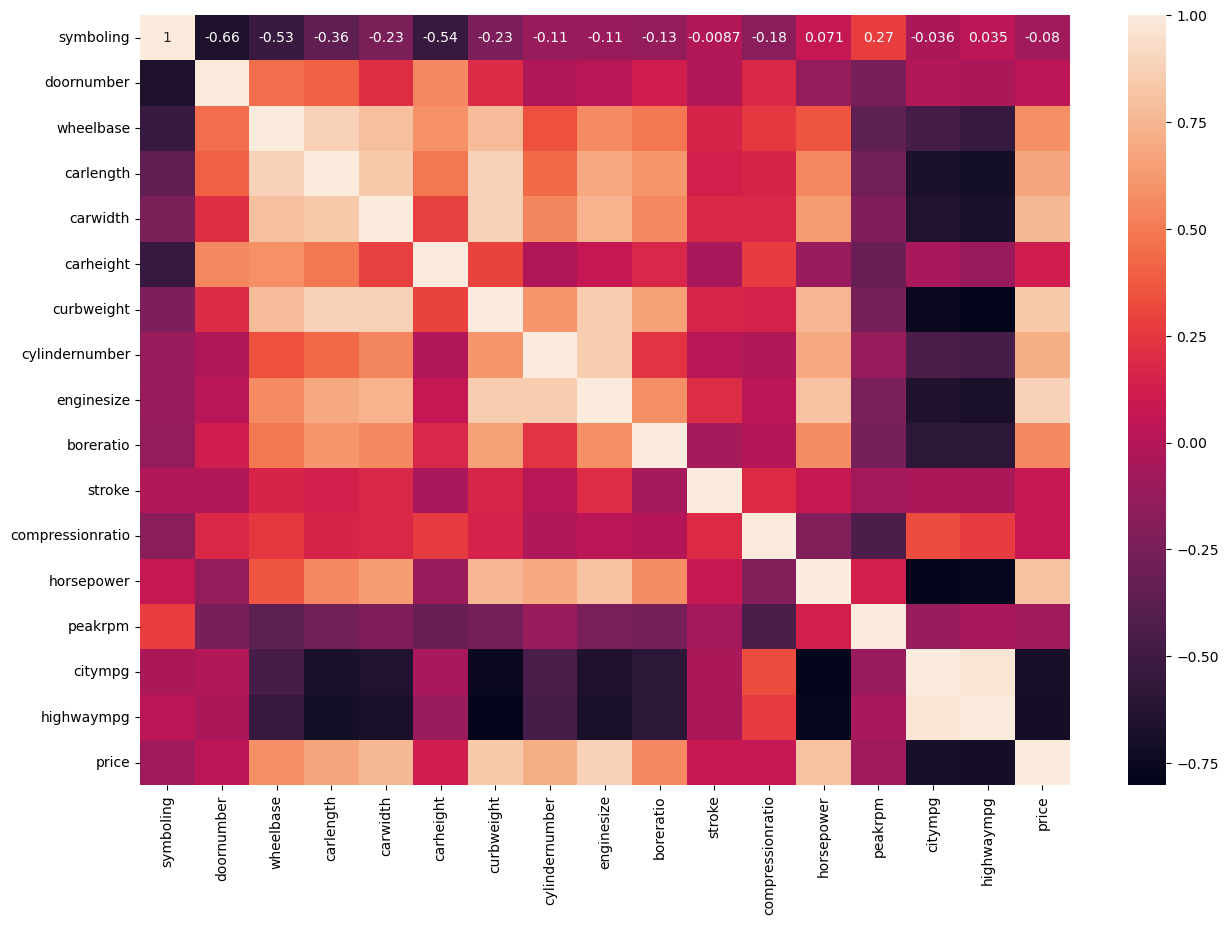

In [33]:
# heatmap to show the correlation beyween all numeric columns
plt.figure(figsize=(15,10))
sns.heatmap(car_df.corr(),annot=True)
plt.show()

---
### Dropping columns again according to their correlation

Columns `stroke`, `compressionratio`, and `peakrpm` needs to be dropped because they don't have much impact or a good correlation with any other variables. 

In [152]:
# dropping columns with low correlation with target column
car.drop(columns=['stroke','compressionratio','peakrpm'],axis=1,inplace=True)

In [153]:
car.head()

,symboling,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,price,Brand
0,3,2,convertible,rwd,88.6,168.8,64.1,48.8,2548,4,130,3.47,111,21,27,13495.0,alfa-romero
1,3,2,convertible,rwd,88.6,168.8,64.1,48.8,2548,4,130,3.47,111,21,27,16500.0,alfa-romero
2,1,2,hatchback,rwd,94.5,171.2,65.5,52.4,2823,6,152,2.68,154,19,26,16500.0,alfa-romero
3,2,4,sedan,fwd,99.8,176.6,66.2,54.3,2337,4,109,3.19,102,24,30,13950.0,audi
4,2,4,sedan,4wd,99.4,176.6,66.4,54.3,2824,5,136,3.19,115,18,22,17450.0,audi


---
##### Removing outliers from the data because it can affect the model during prediction and also affects the LinearRegression line while making the model

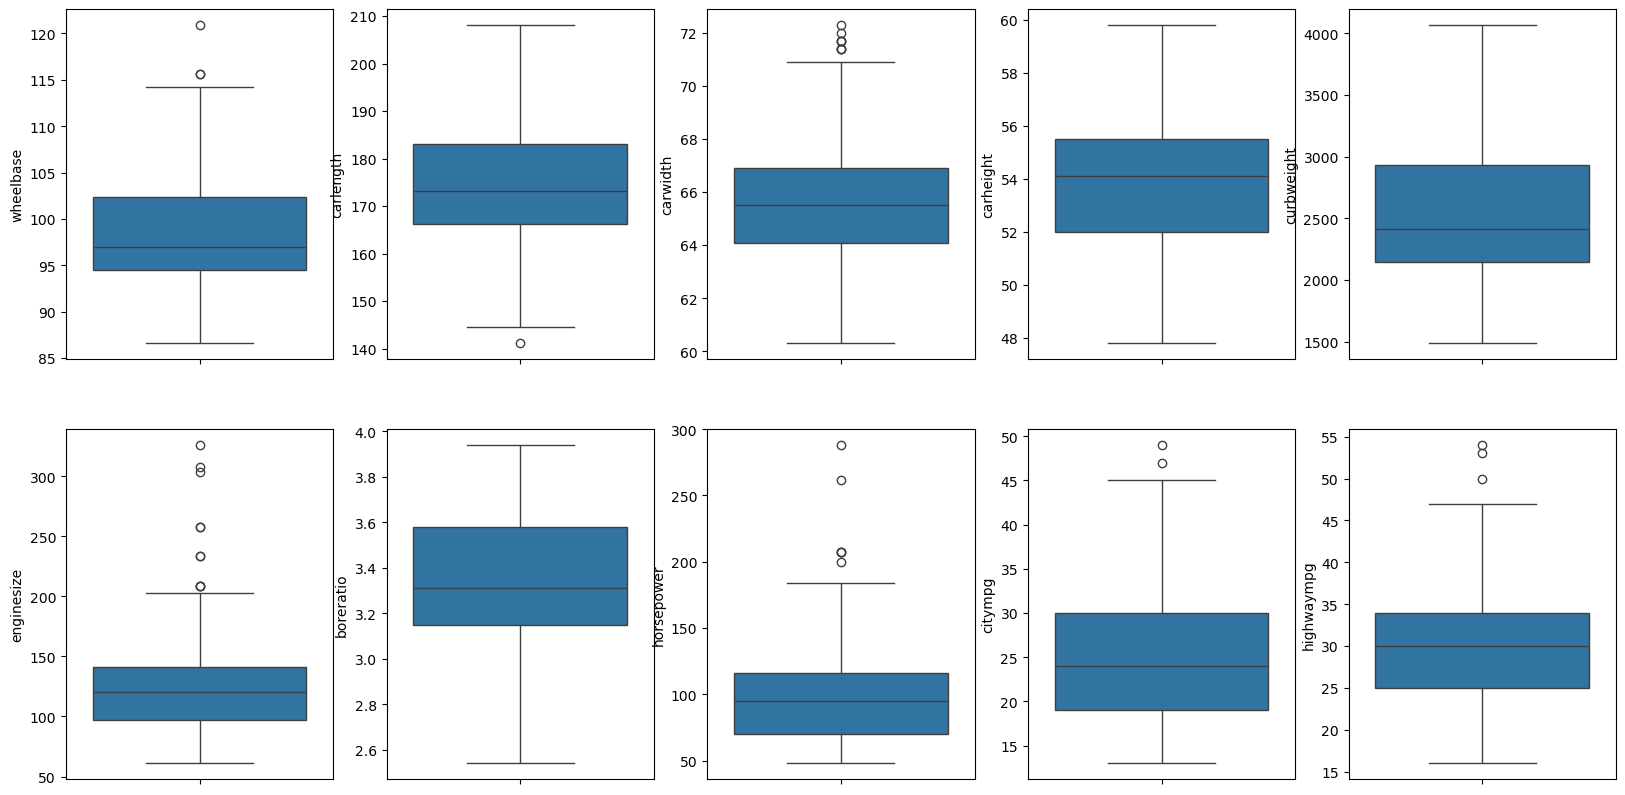

In [154]:
# plotting boxplot to identify outliers
plt.figure(figsize=(20,10))
plt.subplot(2,5,1)
sns.boxplot(y='wheelbase',data=car)
plt.subplot(2,5,2)
sns.boxplot(y='carlength',data=car)
plt.subplot(2,5,3)
sns.boxplot(y='carwidth',data=car)
plt.subplot(2,5,4)
sns.boxplot(y='carheight',data=car)
plt.subplot(2,5,5)
sns.boxplot(y='curbweight',data=car)
plt.subplot(2,5,6)
sns.boxplot(y='enginesize',data=car)
plt.subplot(2,5,7)
sns.boxplot(y='boreratio',data=car)
plt.subplot(2,5,8)
sns.boxplot(y='horsepower',data=car)
plt.subplot(2,5,9)
sns.boxplot(y='citympg',data=car)
plt.subplot(2,5,10)
sns.boxplot(y='highwaympg',data=car)
plt.show()

---
##### From the above graphs, we can see that the column enginesize have a good amount of outliers which needs to be cleaned or removed for the further predictive analysis

In [155]:
# 25th and 75th percentile of the values in enginesize column
Q1_es = car.enginesize.quantile(0.25)
Q3_es = car.enginesize.quantile(0.75)

# onter quartile range of the values
IQR_es = Q3_es - Q1_es

# upper limit : The values greater than this are outliers
upper_es = Q3_es + 1.5*IQR_es

# removing rows with outliers from dataframe
car = car[(car.enginesize < upper_es)]

In [156]:
# 10 rows got deleted after the outliers removal
car.shape

(195, 17)

---
##### As `enginesize`, `horsepower`, and `curbweight` are highly correlated with `price`, we can categorize them into three parts.

- curbweight : light, moderate and, heavy
- enginesize : small, medium, and large
- horsepower : low, medium, and high

In [157]:
# quantiles for all the columns
Q1_hp = car.horsepower.quantile(0.25)
Q3_hp = car.horsepower.quantile(0.75)
Q1_cw = car.curbweight.quantile(0.25)
Q3_cw = car.curbweight.quantile(0.75)

# function definitions
def curb_convert(x):
    if x <= Q1_cw:
        return 'light'
    elif x < Q3_cw and x > Q1_cw:
        return 'moderate'
    else:
        return 'heavy'
        
def es_convert(x):
    if x <= Q1_es:
        return 'small'
    elif x < Q3_es and x > Q1_es:
        return 'medium'
    else:
        return 'large'
        
def hp_convert(x):
    if x <= Q1_hp:
        return 'low'
    elif x < Q3_hp and x > Q1_hp:
        return 'medium'
    else:
        return 'high'

# calling the functions
car['curbtype'] = car['curbweight'].apply(curb_convert)
car['engsize'] = car['enginesize'].apply(es_convert)
car['hptype'] = car['horsepower'].apply(hp_convert)

In [158]:
# all categorical columns or the columns with object dtype
categorical = car.select_dtypes(include=['object'])
categorical.head()

,carbody,drivewheel,Brand,curbtype,engsize,hptype
0,convertible,rwd,alfa-romero,moderate,medium,medium
1,convertible,rwd,alfa-romero,moderate,medium,medium
2,hatchback,rwd,alfa-romero,moderate,large,high
3,sedan,fwd,audi,moderate,medium,medium
4,sedan,4wd,audi,moderate,medium,medium


---
##### Creating `categorical columns` vs `price` box plots to understand data

<Axes: xlabel='hptype', ylabel='price'>

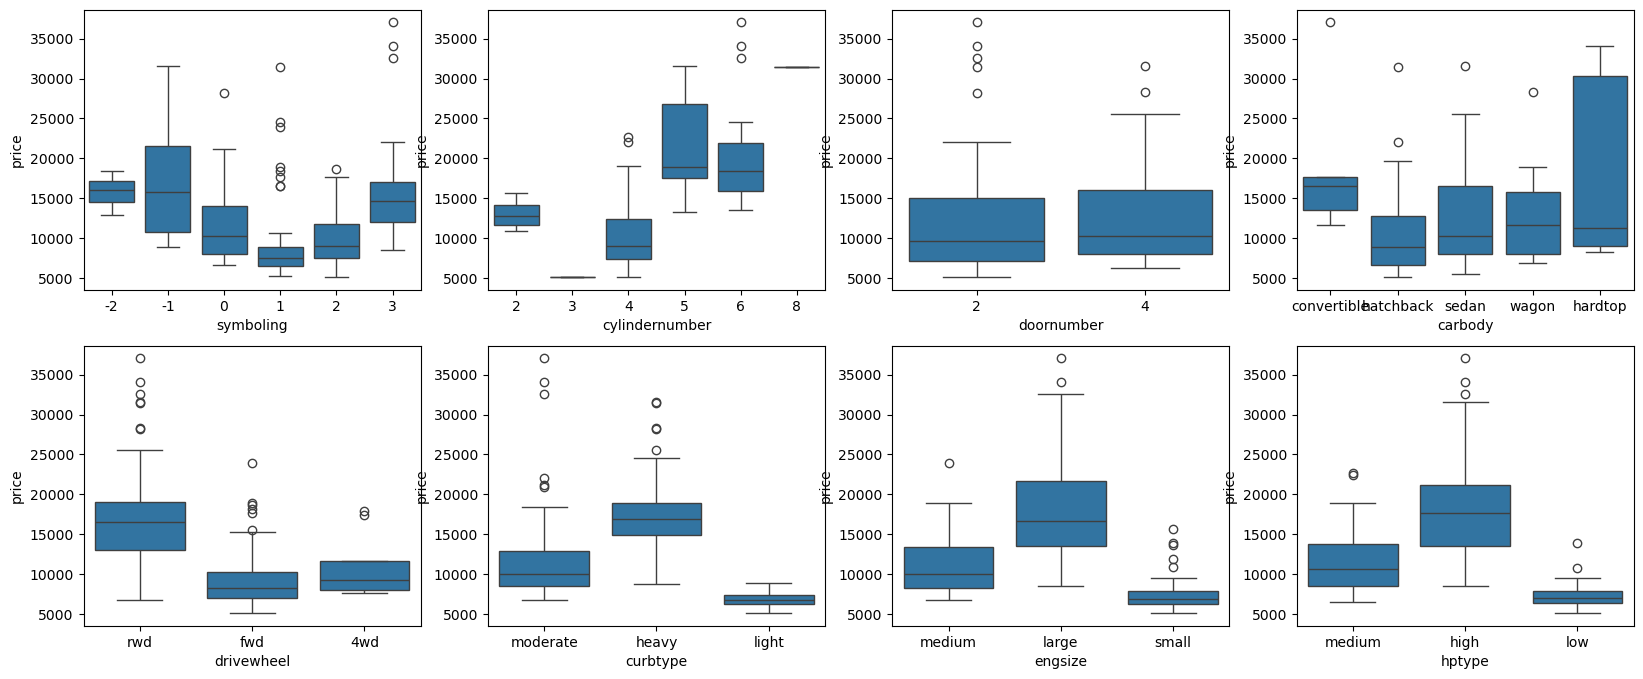

In [159]:
plt.figure(figsize=(20,8))
plt.subplot(2,4,1)
sns.boxplot(x='symboling',y='price',data=car)
plt.subplot(2,4,2)
sns.boxplot(x='cylindernumber',y='price',data=car)
plt.subplot(2,4,3)
sns.boxplot(x='doornumber',y='price',data=car)
plt.subplot(2,4,4)
sns.boxplot(x='carbody',y='price',data=car)
plt.subplot(2,4,5)
sns.boxplot(x='drivewheel',y='price',data=car)
plt.subplot(2,4,6)
sns.boxplot(x='curbtype',y='price',data=car)
plt.subplot(2,4,7)
sns.boxplot(x='engsize',y='price',data=car)
plt.subplot(2,4,8)
sns.boxplot(x='hptype',y='price',data=car)

<Axes: xlabel='Brand', ylabel='price'>

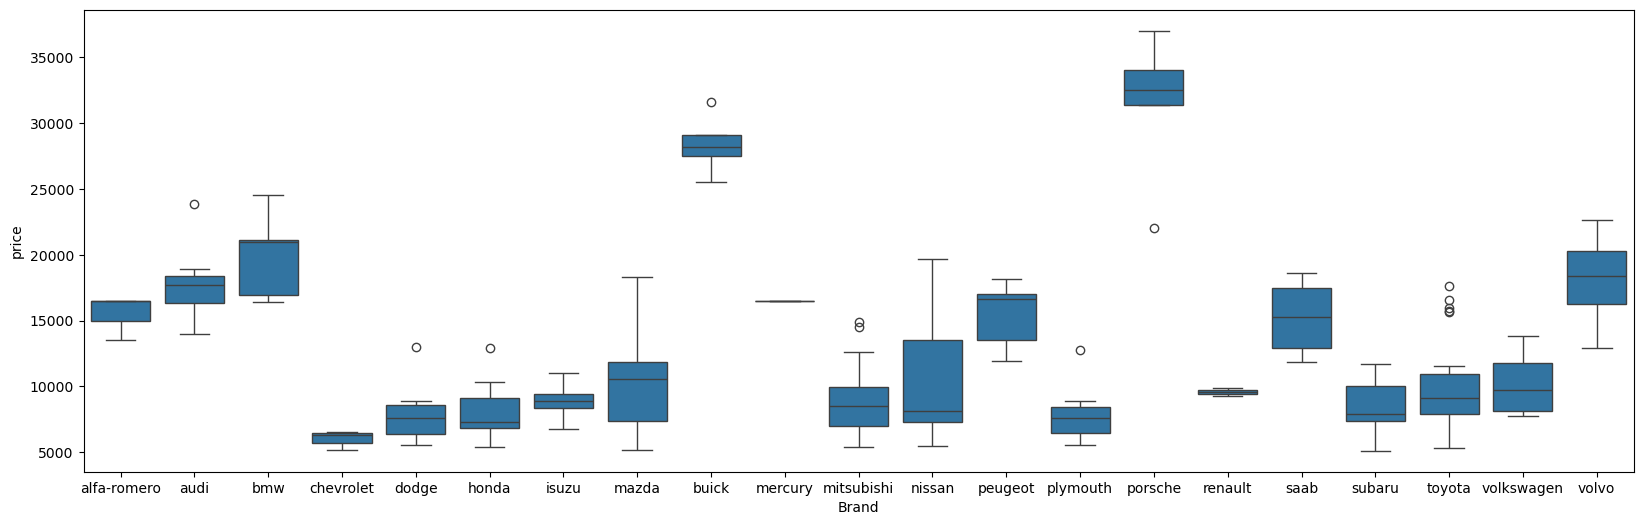

In [160]:
plt.figure(figsize=(20,6))
sns.boxplot(x='Brand',y='price',data=car)

##### Observation sfrom the above boplots:

- The `Brand` boxplot clearly shows us that the car companies like `bmw`, `buick`, `porsche` and `volvo` has higher prices and the lowest belongs to `chevrolet`
- cars having "rwd" `drivewheel` are costly withrespect to other categories.
- Vehicles having more curbweight are supposed to be costly than the light ones.
- `Doornumber` does not have much effect on the price of car.
- Hatchback vehicles have the lowest median price of vehicles in the data set whereas hardtop vehicles have the highest median price.
- Large `enginesize` vehicles are costly as compared to others.
- The cars with extreme (-3 to 3) `symboling` rating have higher price that the average (0 or 1) ones.

---
### Creating dummies of all the categorical columns left in the dataset

In [161]:
# converting to dummies
dummies = pd.get_dummies(categorical,drop_first=True)
dummies.head()

,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,Brand_audi,Brand_bmw,Brand_buick,Brand_chevrolet,Brand_dodge,Brand_honda,Brand_isuzu,Brand_mazda,Brand_mercury,Brand_mitsubishi,Brand_nissan,Brand_peugeot,Brand_plymouth,Brand_porsche,Brand_renault,Brand_saab,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo,curbtype_light,curbtype_moderate,engsize_medium,engsize_small,hptype_low,hptype_medium
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True
2,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True
4,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True


In [162]:
# concat the dummies dataframe to the main dataframe
car = pd.concat([car,dummies],axis=1)

# dropping all the categorical columns as the dummies are already created
car.drop(columns=categorical.columns,axis=1,inplace=True)

In [163]:
car.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,price,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,Brand_audi,Brand_bmw,Brand_buick,Brand_chevrolet,Brand_dodge,Brand_honda,Brand_isuzu,Brand_mazda,Brand_mercury,Brand_mitsubishi,Brand_nissan,Brand_peugeot,Brand_plymouth,Brand_porsche,Brand_renault,Brand_saab,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo,curbtype_light,curbtype_moderate,engsize_medium,engsize_small,hptype_low,hptype_medium
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,111,21,27,13495.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,111,21,27,16500.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,154,19,26,16500.0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,102,24,30,13950.0,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,115,18,22,17450.0,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True


In [164]:
car.shape

(195, 46)

# ---------------------------------------------------------------------------------------------------------------

## Step 3. Model Building
---
### Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [165]:
# splitting the main data into train and test data
car_train, car_test = train_test_split(car, train_size=0.7, test_size=0.3, random_state=100)

In [166]:
x_train = car_train.drop('price', axis=1)
y_train = car_train['price']

---
### Scaling

Now we need to scale the variables for better interpretability.
<br>
As all the final independent variables in our dataset are numeric, we'll scale all the variables
<br>
Let's scale all these columns using StandardScaler. 
You can use any other scaling method as well; it is totally up to you. 


In [167]:
# scaler object
scaler = StandardScaler()
x_train[x_train.columns] = scaler.fit_transform(x_train)

In [168]:
x_train.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,Brand_audi,Brand_bmw,Brand_buick,Brand_chevrolet,Brand_dodge,Brand_honda,Brand_isuzu,Brand_mazda,Brand_mercury,Brand_mitsubishi,Brand_nissan,Brand_peugeot,Brand_plymouth,Brand_porsche,Brand_renault,Brand_saab,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo,curbtype_light,curbtype_moderate,engsize_medium,engsize_small,hptype_low,hptype_medium
3,0.938539,0.862316,0.300864,0.349295,0.291222,0.210773,-0.357333,-0.301113,-0.375031,-0.436398,0.128117,-0.263558,-0.182816,-0.150188,-0.738549,1.076443,-0.402980,0.786796,-0.679975,4.654747,-0.174078,-0.150188,-0.122169,-0.266207,-0.266207,-0.122169,-0.352089,0.0,-0.266207,-0.281718,-0.266207,-0.214834,-0.122169,-0.122169,-0.122169,-0.281718,-0.377964,-0.281718,-0.232945,-0.57735,0.985401,1.045135,-0.6227,-0.611341,1.0
195,-1.500467,0.862316,1.156879,1.462104,0.846708,1.481250,1.220104,-0.301113,0.743637,1.901159,0.513884,-0.430274,-0.505713,-0.150188,-0.738549,-0.928985,2.481511,-1.270978,1.470643,-0.214834,-0.174078,-0.150188,-0.122169,-0.266207,-0.266207,-0.122169,-0.352089,0.0,-0.266207,-0.281718,-0.266207,-0.214834,-0.122169,-0.122169,-0.122169,-0.281718,-0.377964,-0.281718,4.292851,-0.57735,-1.014816,-0.956814,-0.6227,-0.611341,1.0
29,1.751542,-1.159667,-0.441016,0.039168,0.346770,-1.417026,0.715415,-0.301113,1.268012,1.188006,1.510452,-1.097138,-1.151506,-0.150188,1.354006,-0.928985,-0.402980,0.786796,-0.679975,-0.214834,-0.174078,-0.150188,-0.122169,3.756476,-0.266207,-0.122169,-0.352089,0.0,-0.266207,-0.281718,-0.266207,-0.214834,-0.122169,-0.122169,-0.122169,-0.281718,-0.377964,-0.281718,-0.232945,-0.57735,0.985401,-0.956814,-0.6227,-0.611341,-1.0
130,-0.687465,0.862316,-0.402970,0.796243,0.457868,0.568095,0.190357,-0.301113,0.429011,0.633331,-0.257651,-0.430274,-0.021368,-0.150188,-0.738549,-0.928985,2.481511,0.786796,-0.679975,-0.214834,-0.174078,-0.150188,-0.122169,-0.266207,-0.266207,-0.122169,-0.352089,0.0,-0.266207,-0.281718,-0.266207,-0.214834,-0.122169,8.185353,-0.122169,-0.281718,-0.377964,-0.281718,-0.232945,-0.57735,0.985401,1.045135,-0.6227,-0.611341,1.0
133,0.938539,0.862316,0.167706,1.261434,0.457868,0.925416,0.452886,-0.301113,0.044469,0.950288,0.385295,-0.763706,-0.505713,-0.150188,-0.738549,1.076443,-0.402980,0.786796,-0.679975,-0.214834,-0.174078,-0.150188,-0.122169,-0.266207,-0.266207,-0.122169,-0.352089,0.0,-0.266207,-0.281718,-0.266207,-0.214834,-0.122169,-0.122169,8.185353,-0.281718,-0.377964,-0.281718,-0.232945,-0.57735,0.985401,1.045135,-0.6227,-0.611341,1.0


---
### Building the first Linear Regression model with all the features

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In [169]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [170]:
lm.score(x_train,y_train)

0.9649285454615241

##### The model is currently 96.4% accurate which is a very good value during model building

---
### Model Building Using RFE

Now, you have close to 45 features. It is not adviced to manually eliminate these features. So let's now build a model using recursive feature elimination to select features. 

We'll first start off by finding out the optimal number of features using RFECV, and then use the `statsmodels` library to build models using the shortlisted features (this is also because `SKLearn` doesn't have `Adjusted R-squared` that `statsmodels` has).

In [171]:
rfecv = RFECV(estimator=lm,step=1,cv=3)
rfecv.fit(x_train,y_train)
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 38


In [172]:
#  RFE object
lm = LinearRegression()

# RFE with 38 columns
rfe = RFE(estimator=lm, n_features_to_select=38)

# fit with 38 columns
rfe.fit(x_train,y_train)

list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('symboling', True, 1),
 ('doornumber', True, 1),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', True, 1),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('horsepower', True, 1),
 ('citympg', False, 7),
 ('highwaympg', False, 3),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', True, 1),
 ('drivewheel_rwd', True, 1),
 ('Brand_audi', True, 1),
 ('Brand_bmw', True, 1),
 ('Brand_buick', True, 1),
 ('Brand_chevrolet', False, 2),
 ('Brand_dodge', True, 1),
 ('Brand_honda', True, 1),
 ('Brand_isuzu', False, 4),
 ('Brand_mazda', True, 1),
 ('Brand_mercury', False, 8),
 ('Brand_mitsubishi', True, 1),
 ('Brand_nissan', True, 1),
 ('Brand_peugeot', True, 1),
 ('Brand_plymouth', True, 1),
 ('Brand_porsche', True, 1),
 ('Brand_renault', False, 6),
 ('Brand_saab', True, 1),
 ('Brand_subaru', True, 1),
 ('

---
### Building a Linear Model using statsmodels

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. And once you've added the constant to your `x_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

In [173]:
# Subset the features selected by rfe1
col1 = x_train.columns[rfe.support_]

# subsetting training data for 38 columns
x_train_rfe = x_train[col1]

# add constant to model
x_train_rfe = sm.add_constant(x_train_rfe)
x_train_rfe.head()

,const,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,horsepower,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,Brand_audi,Brand_bmw,Brand_buick,Brand_dodge,Brand_honda,Brand_mazda,Brand_mitsubishi,Brand_nissan,Brand_peugeot,Brand_plymouth,Brand_porsche,Brand_saab,Brand_subaru,Brand_toyota,Brand_volvo,curbtype_light,curbtype_moderate,engsize_medium,engsize_small,hptype_low,hptype_medium
3,1.0,0.938539,0.862316,0.300864,0.349295,0.291222,0.210773,-0.357333,-0.301113,-0.375031,-0.436398,0.128117,-0.150188,-0.738549,1.076443,-0.402980,0.786796,-0.679975,4.654747,-0.174078,-0.150188,-0.266207,-0.266207,-0.352089,-0.266207,-0.281718,-0.266207,-0.214834,-0.122169,-0.122169,-0.281718,-0.377964,-0.232945,-0.57735,0.985401,1.045135,-0.6227,-0.611341,1.0
195,1.0,-1.500467,0.862316,1.156879,1.462104,0.846708,1.481250,1.220104,-0.301113,0.743637,1.901159,0.513884,-0.150188,-0.738549,-0.928985,2.481511,-1.270978,1.470643,-0.214834,-0.174078,-0.150188,-0.266207,-0.266207,-0.352089,-0.266207,-0.281718,-0.266207,-0.214834,-0.122169,-0.122169,-0.281718,-0.377964,4.292851,-0.57735,-1.014816,-0.956814,-0.6227,-0.611341,1.0
29,1.0,1.751542,-1.159667,-0.441016,0.039168,0.346770,-1.417026,0.715415,-0.301113,1.268012,1.188006,1.510452,-0.150188,1.354006,-0.928985,-0.402980,0.786796,-0.679975,-0.214834,-0.174078,-0.150188,3.756476,-0.266207,-0.352089,-0.266207,-0.281718,-0.266207,-0.214834,-0.122169,-0.122169,-0.281718,-0.377964,-0.232945,-0.57735,0.985401,-0.956814,-0.6227,-0.611341,-1.0
130,1.0,-0.687465,0.862316,-0.402970,0.796243,0.457868,0.568095,0.190357,-0.301113,0.429011,0.633331,-0.257651,-0.150188,-0.738549,-0.928985,2.481511,0.786796,-0.679975,-0.214834,-0.174078,-0.150188,-0.266207,-0.266207,-0.352089,-0.266207,-0.281718,-0.266207,-0.214834,-0.122169,-0.122169,-0.281718,-0.377964,-0.232945,-0.57735,0.985401,1.045135,-0.6227,-0.611341,1.0
133,1.0,0.938539,0.862316,0.167706,1.261434,0.457868,0.925416,0.452886,-0.301113,0.044469,0.950288,0.385295,-0.150188,-0.738549,1.076443,-0.402980,0.786796,-0.679975,-0.214834,-0.174078,-0.150188,-0.266207,-0.266207,-0.352089,-0.266207,-0.281718,-0.266207,-0.214834,-0.122169,8.185353,-0.281718,-0.377964,-0.232945,-0.57735,0.985401,1.045135,-0.6227,-0.611341,1.0


In [174]:
# fitting the model with 38 variables
lm1 = sm.OLS(y_train,x_train_rfe).fit()

# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     69.99
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           1.35e-55
Time:                        18:39:19   Log-Likelihood:                -1144.1
No. Observations:                 136   AIC:                             2366.
Df Residuals:                      97   BIC:                             2480.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    110.64

- ##### The coefficients should have very low p value (<0.05)
The coefficient is statistically significant. So the association is not purely by chance. 
- ##### R-squared is 96.5%
Meaning that 96.5% of the variance in `price` is explained by these variables.
This is a very good `R-squared` value.
- ##### F statistic should have a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

Now we need to find out VIF values

In [175]:
vif = pd.DataFrame()
vif['Fetures'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Fetures,VIF
9,enginesize,124.60
8,cylindernumber,41.80
7,curbweight,34.83
10,boreratio,33.78
36,engsize_small,30.21
37,hptype_low,21.76
14,carbody_sedan,21.64
35,engsize_medium,20.41
33,curbtype_light,19.87
4,carlength,19.47


---
##### Notice that the highest value VIF is 124.60 which is much greater than the optimal cut-off of 5. These variables isn't of use. Hence we'll drop this column and rebuild our model.

In [176]:
x_train_rfe.drop('enginesize',axis=1,inplace=True)

In [177]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     70.73
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           5.38e-56
Time:                        18:39:20   Log-Likelihood:                -1145.9
No. Observations:                 136   AIC:                             2368.
Df Residuals:                      98   BIC:                             2478.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    111.49

In [178]:
vif = pd.DataFrame()
vif['Fetures'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Fetures,VIF
7,curbweight,30.38
13,carbody_sedan,21.37
36,hptype_low,20.99
4,carlength,19.18
32,curbtype_light,18.79
12,carbody_hatchback,17.54
3,wheelbase,17.24
10,horsepower,17.17
35,engsize_small,16.25
16,drivewheel_rwd,13.43


In [179]:
x_train_rfe.drop('curbweight',axis=1,inplace=True)

In [180]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     54.98
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           4.66e-51
Time:                        18:39:20   Log-Likelihood:                -1164.7
No. Observations:                 136   AIC:                             2403.
Df Residuals:                      99   BIC:                             2511.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    127.42

In [181]:
vif = pd.DataFrame()
vif['Fetures'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Fetures,VIF
35,hptype_low,20.95
12,carbody_sedan,20.82
4,carlength,18.23
11,carbody_hatchback,17.50
3,wheelbase,16.99
9,horsepower,16.72
34,engsize_small,15.49
15,drivewheel_rwd,13.41
31,curbtype_light,13.07
13,carbody_wagon,12.07


In [182]:
x_train_rfe.drop('hptype_low',axis=1,inplace=True)

In [183]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     56.43
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           1.08e-51
Time:                        18:39:20   Log-Likelihood:                -1165.5
No. Observations:                 136   AIC:                             2403.
Df Residuals:                     100   BIC:                             2508.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    127.52

In [184]:
vif = pd.DataFrame()
vif['Fetures'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Fetures,VIF
12,carbody_sedan,20.70
4,carlength,17.78
11,carbody_hatchback,17.50
3,wheelbase,15.29
34,engsize_small,14.15
15,drivewheel_rwd,13.25
31,curbtype_light,13.06
13,carbody_wagon,12.02
5,carwidth,9.91
33,engsize_medium,8.37


In [185]:
x_train_rfe.drop('carbody_sedan',axis=1,inplace=True)

In [186]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     52.45
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           2.75e-50
Time:                        18:39:20   Log-Likelihood:                -1172.7
No. Observations:                 136   AIC:                             2415.
Df Residuals:                     101   BIC:                             2517.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    133.82

In [187]:
vif = pd.DataFrame()
vif['Fetures'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Fetures,VIF
4,carlength,17.71
3,wheelbase,15.14
33,engsize_small,14.10
14,drivewheel_rwd,13.21
30,curbtype_light,13.03
5,carwidth,9.88
32,engsize_medium,8.27
31,curbtype_moderate,8.22
13,drivewheel_fwd,7.75
8,boreratio,7.31


In [188]:
x_train_rfe.drop('carlength',axis=1,inplace=True)

In [189]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     52.08
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           3.39e-50
Time:                        18:39:20   Log-Likelihood:                -1175.7
No. Observations:                 136   AIC:                             2419.
Df Residuals:                     102   BIC:                             2519.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    136.15

In [190]:
vif = pd.DataFrame()
vif['Fetures'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Fetures,VIF
32,engsize_small,13.78
13,drivewheel_rwd,13.21
29,curbtype_light,11.84
3,wheelbase,11.19
4,carwidth,9.13
31,engsize_medium,8.25
30,curbtype_moderate,8.19
12,drivewheel_fwd,7.74
7,boreratio,7.08
8,horsepower,6.99


In [191]:
x_train_rfe.drop('engsize_small',axis=1,inplace=True)

In [192]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     54.21
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           4.64e-51
Time:                        18:39:21   Log-Likelihood:                -1175.8
No. Observations:                 136   AIC:                             2418.
Df Residuals:                     103   BIC:                             2514.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    135.51

In [193]:
vif = pd.DataFrame()
vif['Fetures'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Fetures,VIF
13,drivewheel_rwd,13.10
29,curbtype_light,11.74
3,wheelbase,11.19
4,carwidth,9.11
30,curbtype_moderate,8.08
12,drivewheel_fwd,7.64
22,Brand_peugeot,6.62
8,horsepower,6.45
5,carheight,5.13
28,Brand_volvo,4.96


In [194]:
x_train_rfe.drop('drivewheel_rwd',axis=1,inplace=True)

In [195]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     55.82
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           1.10e-51
Time:                        18:39:21   Log-Likelihood:                -1176.6
No. Observations:                 136   AIC:                             2417.
Df Residuals:                     104   BIC:                             2510.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    135.64

In [196]:
vif = pd.DataFrame()
vif['Fetures'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Fetures,VIF
28,curbtype_light,11.31
3,wheelbase,10.36
4,carwidth,9.10
29,curbtype_moderate,7.93
21,Brand_peugeot,6.26
8,horsepower,6.11
7,boreratio,4.79
27,Brand_volvo,4.66
5,carheight,4.30
1,symboling,3.97


In [197]:
x_train_rfe.drop('curbtype_light',axis=1,inplace=True)

In [198]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     57.34
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           3.03e-52
Time:                        18:39:21   Log-Likelihood:                -1177.6
No. Observations:                 136   AIC:                             2417.
Df Residuals:                     105   BIC:                             2507.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    135.98

In [199]:
vif = pd.DataFrame()
vif['Fetures'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Fetures,VIF
3,wheelbase,10.35
4,carwidth,7.63
21,Brand_peugeot,6.20
8,horsepower,5.20
7,boreratio,4.70
27,Brand_volvo,4.60
5,carheight,4.05
1,symboling,3.92
12,drivewheel_fwd,3.58
6,cylindernumber,3.53


In [200]:
x_train_rfe.drop('wheelbase',axis=1,inplace=True)

In [201]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     53.91
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           6.63e-51
Time:                        18:39:21   Log-Likelihood:                -1184.3
No. Observations:                 136   AIC:                             2429.
Df Residuals:                     106   BIC:                             2516.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    142.18

In [202]:
vif = pd.DataFrame()
vif['Fetures'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Fetures,VIF
3,carwidth,5.55
7,horsepower,5.19
20,Brand_peugeot,5.16
6,boreratio,4.69
26,Brand_volvo,4.42
4,carheight,3.65
1,symboling,3.60
11,drivewheel_fwd,3.57
5,cylindernumber,3.52
2,doornumber,3.42


In [203]:
x_train_rfe.drop('carwidth',axis=1,inplace=True)

In [204]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     42.96
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           4.86e-46
Time:                        18:39:21   Log-Likelihood:                -1201.4
No. Observations:                 136   AIC:                             2461.
Df Residuals:                     107   BIC:                             2545.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    160.51

In [205]:
vif = pd.DataFrame()
vif['Fetures'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Fetures,VIF
6,horsepower,4.53
5,boreratio,4.46
19,Brand_peugeot,4.41
25,Brand_volvo,4.20
3,carheight,3.65
1,symboling,3.60
10,drivewheel_fwd,3.52
4,cylindernumber,3.29
2,doornumber,3.22
28,hptype_medium,3.18


---
##### The large VIFs have now dropped to a workable value. But from the p-value perspective, some features are still insignificant and needed to be dropped i.e. whose p-values are greater than 0.05

In [206]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     42.96
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           4.86e-46
Time:                        18:39:21   Log-Likelihood:                -1201.4
No. Observations:                 136   AIC:                             2461.
Df Residuals:                     107   BIC:                             2545.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    160.51

In [207]:
x_train_rfe.drop('carbody_hardtop',axis=1,inplace=True)

In [208]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     44.96
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           7.21e-47
Time:                        18:39:21   Log-Likelihood:                -1201.4
No. Observations:                 136   AIC:                             2459.
Df Residuals:                     108   BIC:                             2540.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    159.78

In [209]:
x_train_rfe.drop('carbody_wagon',axis=1,inplace=True)

In [210]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     47.10
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           1.06e-47
Time:                        18:39:22   Log-Likelihood:                -1201.4
No. Observations:                 136   AIC:                             2457.
Df Residuals:                     109   BIC:                             2535.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    159.07

In [211]:
x_train_rfe.drop('carbody_hatchback',axis=1,inplace=True)

In [212]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     49.41
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           1.52e-48
Time:                        18:39:22   Log-Likelihood:                -1201.5
No. Observations:                 136   AIC:                             2455.
Df Residuals:                     110   BIC:                             2531.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    158.38

In [213]:
x_train_rfe.drop('Brand_honda',axis=1,inplace=True)

In [214]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     51.92
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           2.13e-49
Time:                        18:39:22   Log-Likelihood:                -1201.5
No. Observations:                 136   AIC:                             2453.
Df Residuals:                     111   BIC:                             2526.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    157.70

In [215]:
x_train_rfe.drop('boreratio',axis=1,inplace=True)

In [216]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     54.62
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           2.95e-50
Time:                        18:39:22   Log-Likelihood:                -1201.5
No. Observations:                 136   AIC:                             2451.
Df Residuals:                     112   BIC:                             2521.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    157.05

In [217]:
x_train_rfe.drop('hptype_medium',axis=1,inplace=True)

In [218]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     57.45
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           4.43e-51
Time:                        18:39:22   Log-Likelihood:                -1201.7
No. Observations:                 136   AIC:                             2449.
Df Residuals:                     113   BIC:                             2516.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    156.56

In [219]:
x_train_rfe.drop('Brand_nissan',axis=1,inplace=True)

In [220]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     60.58
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           6.29e-52
Time:                        18:39:22   Log-Likelihood:                -1201.8
No. Observations:                 136   AIC:                             2448.
Df Residuals:                     114   BIC:                             2512.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    156.03

In [221]:
x_train_rfe.drop('engsize_medium',axis=1,inplace=True)

In [222]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     63.79
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           1.05e-52
Time:                        18:39:22   Log-Likelihood:                -1202.2
No. Observations:                 136   AIC:                             2446.
Df Residuals:                     115   BIC:                             2508.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    155.77

In [223]:
x_train_rfe.drop('carheight',axis=1,inplace=True)

In [224]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     67.19
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           1.91e-53
Time:                        18:39:22   Log-Likelihood:                -1202.7
No. Observations:                 136   AIC:                             2445.
Df Residuals:                     116   BIC:                             2504.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    155.67

In [225]:
x_train_rfe.drop('symboling',axis=1,inplace=True)

In [226]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     70.39
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           5.21e-54
Time:                        18:39:22   Log-Likelihood:                -1203.7
No. Observations:                 136   AIC:                             2445.
Df Residuals:                     117   BIC:                             2501.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    156.15

In [227]:
x_train_rfe.drop('Brand_dodge',axis=1,inplace=True)

In [228]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     73.52
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           1.92e-54
Time:                        18:39:22   Log-Likelihood:                -1205.1
No. Observations:                 136   AIC:                             2446.
Df Residuals:                     118   BIC:                             2499.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    157.07

In [229]:
x_train_rfe.drop('Brand_mitsubishi',axis=1,inplace=True)

In [230]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     77.06
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           6.98e-55
Time:                        18:39:22   Log-Likelihood:                -1206.5
No. Observations:                 136   AIC:                             2447.
Df Residuals:                     119   BIC:                             2496.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    158.00

In [231]:
x_train_rfe.drop('Brand_plymouth',axis=1,inplace=True)

In [232]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     81.46
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           1.92e-55
Time:                        18:39:22   Log-Likelihood:                -1207.5
No. Observations:                 136   AIC:                             2447.
Df Residuals:                     120   BIC:                             2494.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    158.58

In [233]:
x_train_rfe.drop('Brand_toyota',axis=1,inplace=True)

In [234]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     86.80
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           4.26e-56
Time:                        18:39:22   Log-Likelihood:                -1208.4
No. Observations:                 136   AIC:                             2447.
Df Residuals:                     121   BIC:                             2490.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    158.92

In [235]:
x_train_rfe.drop('Brand_subaru',axis=1,inplace=True)

In [236]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     91.41
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           2.30e-56
Time:                        18:39:22   Log-Likelihood:                -1210.3
No. Observations:                 136   AIC:                             2449.
Df Residuals:                     122   BIC:                             2489.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    160.48

In [237]:
x_train_rfe.shape

(136, 14)

##### All the VIF values and p-values seem to be in a good range. We came down from 38 variables to 14 variables. This model is explaining most of the variance without being too complex. So let's proceed with this model.

---
## Residual analysis 
To validate assumptions of the model, and hence the reliability for inference

### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [238]:
y_train_pred = lm1.predict(x_train_rfe)
res = y_train - y_train_pred

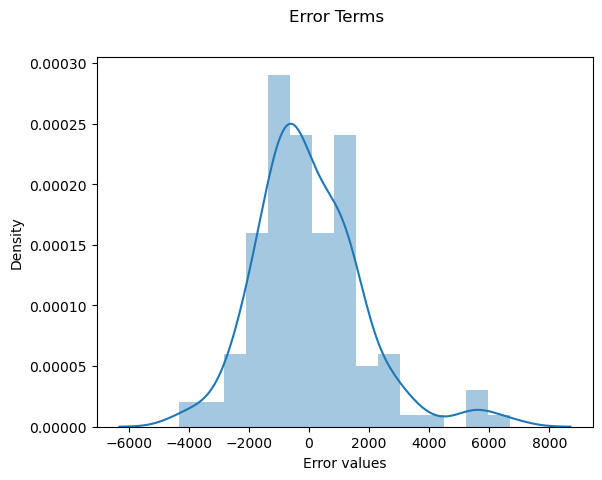

In [239]:
fig = plt.figure()
sns.distplot(res,bins=15)
plt.suptitle("Error Terms")
plt.xlabel("Error values")
plt.show()

##### The residuals are following a normal curve and the mean is negative.

---
### Model Evaluation

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, first need to add a constant to the `x_test` data like you did for `x_train` and then you can simply go on and predict the y values corresponding to `x_test` using the `predict` attribute of the fitted regression line.

In [240]:
col1 = x_train_rfe.columns
col1

Index(['const', 'doornumber', 'cylindernumber', 'horsepower', 'drivewheel_fwd',
       'Brand_audi', 'Brand_bmw', 'Brand_buick', 'Brand_mazda',
       'Brand_peugeot', 'Brand_porsche', 'Brand_saab', 'Brand_volvo',
       'curbtype_moderate'],
      dtype='object')

In [241]:
x_test = car_test.drop('price', axis=1)
y_test = car_test['price']

In [242]:
# subsetting
x_test[x_test.columns] = scaler.transform(x_test)

In [243]:
# adding constant to test dataset
x_test = sm.add_constant(x_test,has_constant='add')

In [244]:
x_test.head()

,const,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,Brand_audi,Brand_bmw,Brand_buick,Brand_chevrolet,Brand_dodge,Brand_honda,Brand_isuzu,Brand_mazda,Brand_mercury,Brand_mitsubishi,Brand_nissan,Brand_peugeot,Brand_plymouth,Brand_porsche,Brand_renault,Brand_saab,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo,curbtype_light,curbtype_moderate,engsize_medium,engsize_small,hptype_low,hptype_medium
174,1.0,-1.500467,0.862316,0.795451,0.258082,0.457868,0.448988,-0.033698,-0.301113,-0.340073,-0.119442,-0.804156,0.736737,0.301528,-0.150188,-0.738549,1.076443,-0.40298,0.786796,-0.679975,-0.214834,-0.174078,-0.150188,-0.122169,-0.266207,-0.266207,-0.122169,-0.352089,0.0,-0.266207,-0.281718,-0.266207,-0.214834,-0.122169,-0.122169,-0.122169,-0.281718,2.645751,-0.281718,-0.232945,-0.577350,0.985401,1.045135,-0.6227,-0.611341,1.0
198,1.0,-2.313470,0.862316,1.156879,1.462104,0.846708,0.965119,1.244999,-0.301113,0.359095,1.267245,2.056956,-1.430569,-1.474402,-0.150188,-0.738549,1.076443,-0.40298,-1.270978,1.470643,-0.214834,-0.174078,-0.150188,-0.122169,-0.266207,-0.266207,-0.122169,-0.352089,0.0,-0.266207,-0.281718,-0.266207,-0.214834,-0.122169,-0.122169,-0.122169,-0.281718,-0.377964,-0.281718,4.292851,-0.577350,-1.014816,1.045135,-0.6227,-0.611341,-1.0
156,1.0,-0.687465,0.862316,-0.479061,-0.590207,-0.708653,-0.305358,-0.936708,-0.301113,-0.759574,-0.436398,-0.900598,0.736737,0.947321,-0.150188,-0.738549,1.076443,-0.40298,0.786796,-0.679975,-0.214834,-0.174078,-0.150188,-0.122169,-0.266207,-0.266207,-0.122169,-0.352089,0.0,-0.266207,-0.281718,-0.266207,-0.214834,-0.122169,-0.122169,-0.122169,-0.281718,2.645751,-0.281718,-0.232945,1.732051,-1.014816,1.045135,-0.6227,1.635749,-1.0
136,1.0,1.751542,-1.159667,0.167706,1.261434,0.457868,0.925416,0.708625,-0.301113,0.044469,0.950288,1.992661,-1.097138,-0.828609,-0.150188,1.354006,-0.928985,-0.40298,0.786796,-0.679975,-0.214834,-0.174078,-0.150188,-0.122169,-0.266207,-0.266207,-0.122169,-0.352089,0.0,-0.266207,-0.281718,-0.266207,-0.214834,-0.122169,-0.122169,8.185353,-0.281718,-0.377964,-0.281718,-0.232945,-0.577350,0.985401,1.045135,-0.6227,-0.611341,-1.0
161,1.0,-0.687465,0.862316,-0.479061,-0.590207,-0.708653,-0.384763,-0.843917,-0.301113,-0.759574,-0.436398,-0.900598,0.403305,0.462977,-0.150188,1.354006,-0.928985,-0.40298,0.786796,-0.679975,-0.214834,-0.174078,-0.150188,-0.122169,-0.266207,-0.266207,-0.122169,-0.352089,0.0,-0.266207,-0.281718,-0.266207,-0.214834,-0.122169,-0.122169,-0.122169,-0.281718,2.645751,-0.281718,-0.232945,1.732051,-1.014816,1.045135,-0.6227,1.635749,-1.0


In [245]:
x_test_rfe = x_test[col1]

In [246]:
x_test_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 174 to 132
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   const              59 non-null     float64
 1   doornumber         59 non-null     float64
 2   cylindernumber     59 non-null     float64
 3   horsepower         59 non-null     float64
 4   drivewheel_fwd     59 non-null     float64
 5   Brand_audi         59 non-null     float64
 6   Brand_bmw          59 non-null     float64
 7   Brand_buick        59 non-null     float64
 8   Brand_mazda        59 non-null     float64
 9   Brand_peugeot      59 non-null     float64
 10  Brand_porsche      59 non-null     float64
 11  Brand_saab         59 non-null     float64
 12  Brand_volvo        59 non-null     float64
 13  curbtype_moderate  59 non-null     float64
dtypes: float64(14)
memory usage: 6.9 KB


In [247]:
# predicting y values corresponding to x_test_rfe
y_pred = lm1.predict(x_test_rfe)

In [248]:
y_pred.head()

174     8383.630400
198    20604.810772
156     7257.923240
136    16723.890029
161     7257.923240
dtype: float64

In [249]:
y_test.head()

174    10698.0
198    18420.0
156     6938.0
136    18150.0
161     8358.0
Name: price, dtype: float64

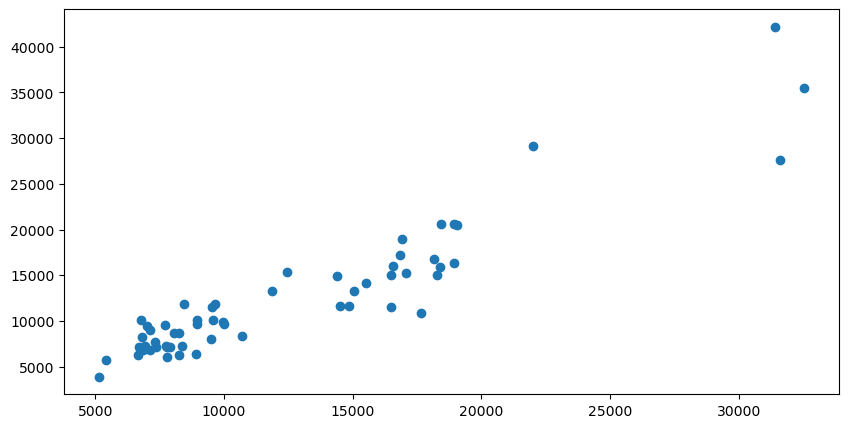

In [250]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)

##### From the above plot, it's evident that the model is doing good on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

In [251]:
# Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test,y_pred))

2658.2672229959107

In [252]:
# chacking r-squared of the test set
r_square = r2_score(y_test,y_pred)
r_square

0.8264312523940245

---
### Checking the correlations between the final predictor variables

<Axes: >

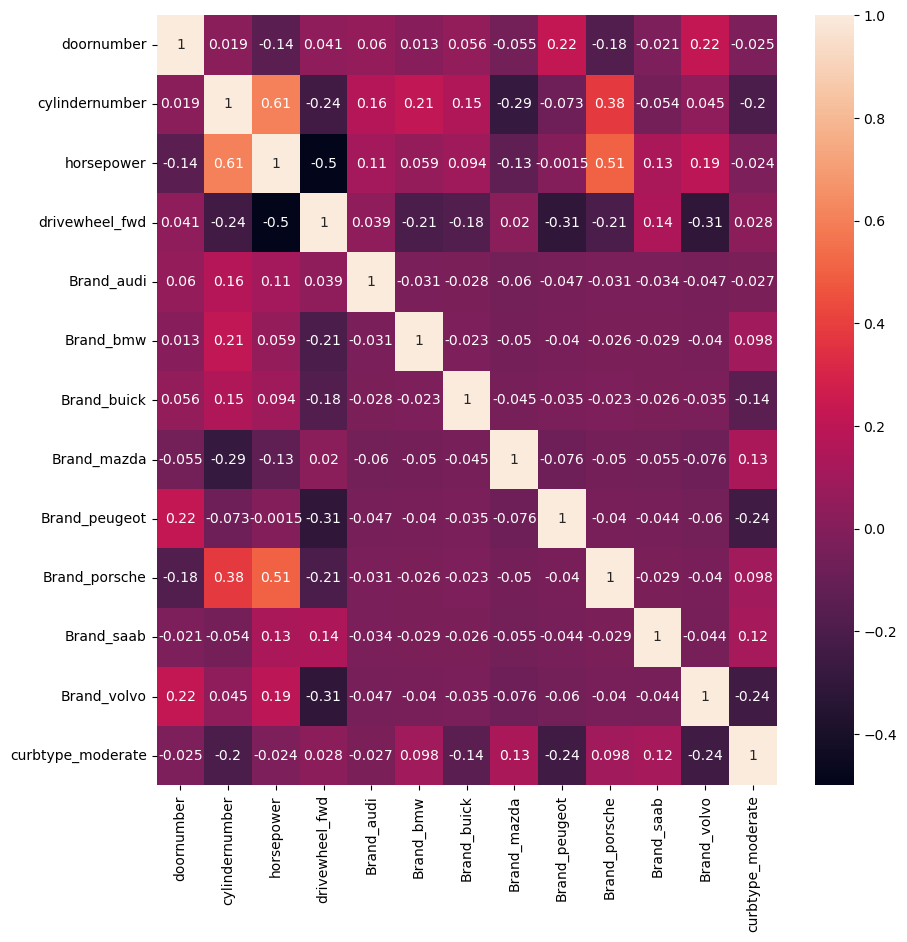

In [253]:
features = ['doornumber', 'cylindernumber', 'horsepower', 'drivewheel_fwd',
       'Brand_audi', 'Brand_bmw', 'Brand_buick', 'Brand_mazda',
       'Brand_peugeot', 'Brand_porsche', 'Brand_saab', 'Brand_volvo',
       'curbtype_moderate']
plt.figure(figsize=(10,10))
sns.heatmap(car[features].corr(), annot=True)

Most of the final predictors seems to have low correlation